# Use ML to predict the Heart Disease Motality based on the social local policies and life styles

### Target is classified in 4 categories
---
    4. High Rate
    3. Medium Rate
    2. Med-Low Rate
    1. Low Rate
    
### Data Limitation
---

We collected the data from the public data of government agency websites. The data were collected based on common survey questions or common social features of counties. We were very limited or no access to unquiue features of each county such as the local norms, family styles, food consumsion, medical records or people genes. This is one limitation about the data that we collected.
    
Based on the second week ML analysis, Random Forest ML is our best model. Its accuracy is 60%. The lowest recall is level 3 (Medium) 23% while level 1 (low) is 58%, level 2 (mid-low) is 70% and level 4 is 77%. We have four different categories and the accuracy 60% to predict correctly the outcome. This number is very impressive compare to the natual of lucks (25%). Let look into the recall rate. the level 1, 2, or 4 are higher than 60% so it is very good prediction. The level 3 is 23% lowest rate becuase Level 3 has only 644 data points compare to level 1 (804), level 2 (969) and level 4 (808). On overall, the model gave a very good accuracy and recall rate.
    
    
### Conclusion
---

The accuracy of prediction of heart disease motality is used different ML classifiers. The Random Forest with  500 estimators and 10 level depth and good preprocess data gave the best accuracy among ML classifiers for our project. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Query data from SQLite

In [3]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [4]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)

# Preprocess data

In [5]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Uninsured,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Level
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,...,3135.000000,3.135000e+03,3.136000e+03,3.135000e+03,3.136000e+03,3.136000e+03,3.136000e+03,3.136000e+03,3.136000e+03,3136.000000
mean,17.924745,3.989764,4.167793,17.453763,32.909758,7.410459,27.431122,62.750638,17.510204,11.468112,...,8907.109091,7.637240e+04,1.880622e+04,1.330748e+04,8.574782e+03,1.886127e+04,2.017106e+04,2.186569e+04,3.458574e+04,2.488202
std,4.730310,0.703172,0.601451,3.586137,5.452988,1.268939,5.704390,23.433839,3.162866,5.147112,...,35131.797061,2.502972e+05,5.264962e+04,4.561369e+04,3.725549e+04,5.084563e+04,6.089211e+04,7.969008e+04,1.115141e+05,1.107545
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,23.000000,1.190000e+02,1.000000e+01,5.000000e+00,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,1.900000e+01,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,48.000000,15.000000,7.000000,...,885.500000,7.325500e+03,2.584750e+03,1.596000e+03,9.927500e+02,2.810500e+03,2.295250e+03,1.204000e+03,3.312000e+03,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.600000,27.000000,66.000000,18.000000,11.000000,...,2145.000000,1.764600e+04,5.792500e+03,3.768000e+03,2.497000e+03,6.407500e+03,5.325500e+03,3.168000e+03,8.009500e+03,2.000000
75%,21.000000,4.400000,4.600000,20.000000,37.000000,8.200000,31.000000,80.000000,20.000000,14.000000,...,5683.000000,4.734700e+04,1.443000e+04,9.388500e+03,5.742500e+03,1.518875e+04,1.440850e+04,1.045050e+04,2.254125e+04,4.000000
max,41.000000,6.600000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,935213.000000,7.703359e+06,1.527541e+06,1.409155e+06,1.460718e+06,1.416482e+06,1.790808e+06,2.177481e+06,3.260029e+06,4.000000


In [6]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways",\
                 "Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty",\
                 "Teen_Birth_Rate"], inplace=True)

In [7]:
# Convert to numbers
df['Avg_Temp_C'] = pd.to_numeric(df['Avg_Temp_C'], errors='coerce')
df['Avg_Precipitation_Inches'] = pd.to_numeric(df['Avg_Precipitation_Inches'], errors='coerce')

In [8]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [9]:
# Copy dataframe
df2 = df.copy()

In [10]:
# Drop Combo keys of dataframe
keys = ['State_Name', 'County']

In [11]:
# Find Object Type Columns 
obj_cols =list(df.dtypes[df.dtypes=='object'].index)
obj_cols = [ name for name in obj_cols if not name in keys]

In [12]:
# Covert object columns to numbers
df_encoder = pd.get_dummies(df[obj_cols])

In [13]:
# Merge the two DataFrames together and drop the Country column
df = df.merge(df_encoder,left_index=True,right_index=True)

# Select Features and Target for ML

In [14]:
# Drop column list
# Column Level is Target
drop_cols = keys + obj_cols + ["Level"]
# Target
y = df["Level"].values
# Create our features
X = df.drop(columns= drop_cols)

# Split Features and Target with the ratio 25% Test and 75% Train

In [15]:
# Create X_train, X_test, y_train, y_test
# Test Size is 25% and Train Size 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78, stratify=y)

In [16]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled =  X_scaler.transform(X)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Best depth
depth = 10
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78, max_depth= depth, criterion='entropy') 
rf_model = rf_model.fit(X_train_scaled, y_train)
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5956632653061225

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,105,66,5,5
Actual 2,33,169,16,23
Actual 3,2,69,37,52
Actual 4,1,23,22,156


In [20]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.58      0.65       181
           2       0.52      0.70      0.60       241
           3       0.46      0.23      0.31       160
           4       0.66      0.77      0.71       202

    accuracy                           0.60       784
   macro avg       0.60      0.57      0.57       784
weighted avg       0.60      0.60      0.58       784



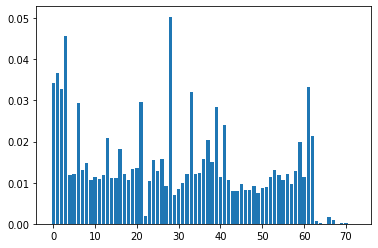

[(0.05035460971567161, 'Median_Household_Income'),
 (0.04568585842864093, 'Percent_Smokers'),
 (0.036743023359700186, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.03420175016263674, 'Percent_Fair_or_Poor_Health'),
 (0.03322230820596386, 'Avg_Temp_C'),
 (0.03282847201666572, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.03212658439168694, 'Household_Income_White'),
 (0.029561245612293497, 'Polution_Average_Daily_PM2.5'),
 (0.029462053809216928, 'Percent_Physically_Inactive'),
 (0.028291657412339414, 'Population_Hispanic')]

In [21]:
importances = rf_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

### Summary
**Random Forest** accuracy is **60%**. The lowest recall is level 3 (Medium - Heart Disease Motality) 23% while level 1 (low) is 58%, level 2 (mid-low) is 70% and level 4 is 77%. The accuracy is the best so far and the recall is much better to compare to another ML classifiers

## Export Data and Dicide

In [22]:
# Running model on entire dataset
total_predict = rf_model.predict(X_scaled)

# Add Predicted level and correct? columns to dataframe
df2['Predicted_Level']= pd.Series(total_predict)
df2['Correct?']= pd.Series(df2['Level'] == total_predict)

#Extract predicted dataframe to csv for tableau visualization
df2.to_csv(r'data/predicted_outcomes.csv')


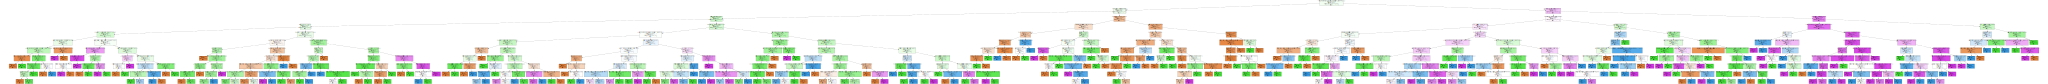

In [23]:
#Print Tree
import graphviz
from sklearn import tree
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None,
                      feature_names=X.columns,
                      class_names=["1","2","3","4"],
                      filled=True)
graph = graphviz.Source(classification_tree)
graph